# Importing Data

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

stock = pd.read_csv("test.csv")
stock.head(n=10)

,date,time,open,high,low,close,volume
0,01/02/2014,04:00,72.21,72.21,72.21,72.21,1441
1,01/02/2014,04:08,72.56,72.56,72.56,72.56,1533
2,01/02/2014,04:09,72.55,72.55,72.55,72.55,767
3,01/02/2014,04:11,72.50,72.50,72.50,72.50,1533
4,01/02/2014,04:12,72.50,72.54,72.50,72.54,5266
5,01/02/2014,04:13,72.54,72.54,72.54,72.54,3066
6,01/02/2014,04:14,72.54,72.54,72.54,72.54,16173
7,01/02/2014,04:15,72.55,72.55,72.55,72.55,2300
8,01/02/2014,04:27,72.55,72.58,72.54,72.54,4131
9,01/02/2014,04:29,72.54,72.54,72.54,72.54,767


# Data Cleanup

In [200]:
#create new data frame df['date','time','open']
df = pd.DataFrame(stock.date, columns=['date'])
df['time'] = stock.time
df['open'] = stock.open
df['volume'] = stock.volume


#create placeholer rows to store hour and minute values of each data point
h = []
m = []

#split 'time' string into hour and minute strings, then convert them into integers and add to an array
for i in range(1206):
    (hr,mn) = df.time[i].split(":")
    hr = int(hr)
    mn = int(mn)
    h.append(hr)
    m.append(mn)

#add hour and minute columns    
df['hour'] = h
df['minute'] = m

#check if in market hours, if it's not delete rows 
for j in range(1206):
    if df.hour[j] < 9 or (df.hour[j] == 9 and df.minute[j] < 30) or (df.hour[j] >= 16 and df.minute[j] > 0) or df.hour[j] > 16:
         df.drop([j],axis=0,inplace=True)

#delete placeholder 'hour' and 'minute' columns
df.drop(['hour','minute'],axis=1,inplace=True)                        
df.tail(n=10)

,date,time,open,volume
1082,01/03/2014,15:51,70.76,842208
1083,01/03/2014,15:52,70.69,498224
1084,01/03/2014,15:53,70.68,784755
1085,01/03/2014,15:54,70.62,918010
1086,01/03/2014,15:55,70.53,1248290
1087,01/03/2014,15:56,70.58,914822
1088,01/03/2014,15:57,70.55,781038
1089,01/03/2014,15:58,70.56,1046544
1090,01/03/2014,15:59,70.55,1885365
1091,01/03/2014,16:00,70.59,3408129


# Visualising the Stock Price

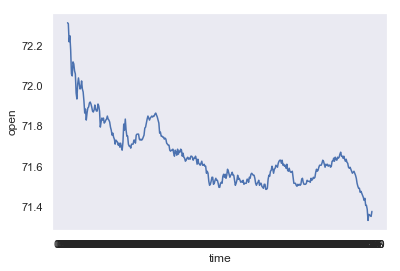

In [198]:
import seaborn as sns
sns.set(style="dark")

ax = sns.lineplot(x='time',y='open',data=df, ci = None)


# Visualising the Volume 

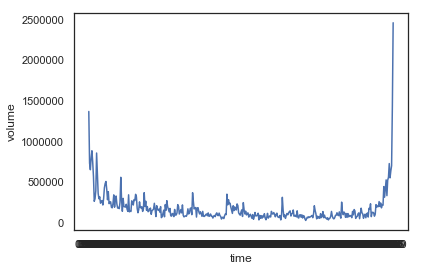

In [196]:
sns.set(style="white")
fx = sns.lineplot(x='time',y='volume',data=df, ci = None)